# Zimbabwe maps

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import os
from shapely.geometry import Point
import adjustText as aT

In [45]:
from os.path import isfile, join
prov_path = '/Users/sophieayling/Google Drive/PhD/09_Visualization/maps/'
dist_path = '/Users/sophieayling/Documents/GitHub/Disease-Modelling-SSA/data/raw/shapefiles/new_districts/'

In [46]:
pwd

'/Users/sophieayling/Documents/GitHub/Disease-Modelling-SSA/data/raw/shapefiles/new_districts'

In [47]:
zim_prov = gpd.read_file(prov_path+'zwe_admbnda_adm1_zimstat_ocha_20180911/zwe_admbnda_adm1_zimstat_ocha_20180911.shp')

<AxesSubplot:>

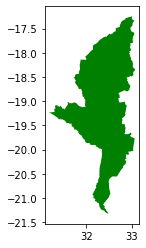

In [13]:
# plotting just Manicaland
manicaland = zim_prov[(zim_prov.ADM1_EN == "Manicaland")]
manicaland.plot(color='green')

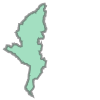

In [14]:
#another way of doing the above
zim_prov.loc[2, 'geometry']

<AxesSubplot:>

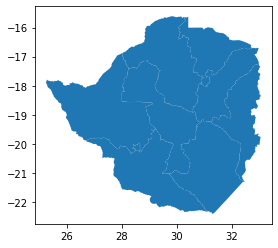

In [15]:
# plot everywhere
zim_prov.plot()

<AxesSubplot:>

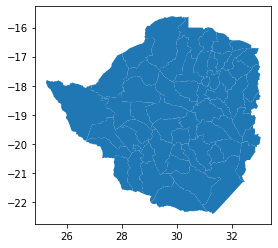

In [48]:
# read in district level data 
zim_dist = gpd.read_file(dist_path+'ZWE_adm2.shp')
zim_dist = zim_dist.to_crs(epsg=4326)
zim_dist.plot()

In [49]:
zim_dist.columns

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'ID_2', 'NAME_2', 'TYPE_2',
       'ENGTYPE_2', 'NL_NAME_2', 'VARNAME_2', 'geometry'],
      dtype='object')

<ipython-input-43-0e8ce9ec8210>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zim_dist["center"] = zim_dist["geometry"].centroid


1

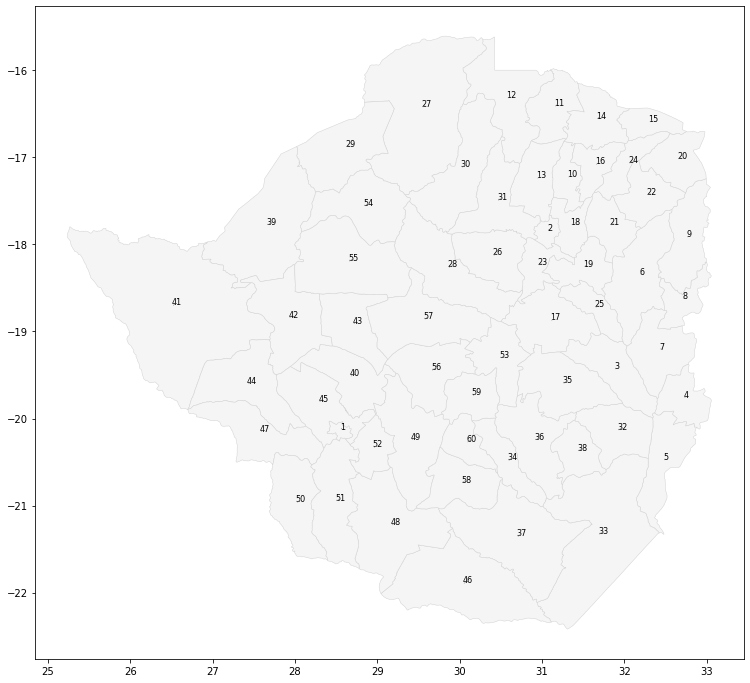

In [43]:
# Here we find the center points, copy our original df to a new df, and then set 
# the geometry column to the newly created center points column 
# (because a GeoPandas df can only have one geometry column)

zim_dist["center"] = zim_dist["geometry"].centroid
zim_points = zim_dist.copy()
zim_points.set_geometry("center", inplace = True)


ax = zim_dist.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
texts = []

for x, y, label in zip(zim_points.geometry.x, zim_points.geometry.y, zim_points["ID_2"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

plt.savefig(path)

<AxesSubplot:>

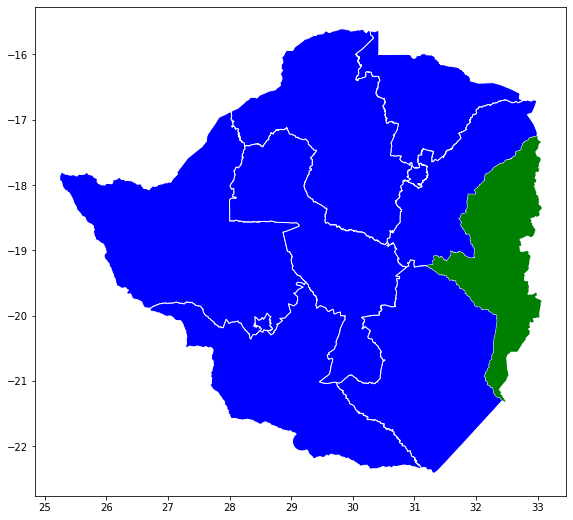

In [16]:
fig, ax = plt.subplots(1,1, figsize=(12,9))  # dimensionality of 4/3, can be 10/9

# Plot both to the same axes
zim_prov.plot(ax=ax, edgecolor="white", facecolor='blue')
manicaland.plot(ax=ax, facecolor='green')